## Cibi Bike Hotspot and Coldspot difference in Winter and Summer

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
from geopandas import GeoDataFrame
import statsmodels.api as sm
import shapely
import pysal as ps
import seaborn as sns
from matplotlib import colors
import os

In [4]:
shape_path= os.getenv("PUIDATA") + '/ct_shape.shp'
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

In [5]:
ct_shape.head(3)

BoroCT2010 BoroCode       BoroName CDEligibil  CT2010 CTLabel  \
BoroCT2010                                                                 
5000900       5000900        5  Staten Island          I  000900       9   
5012500       5012500        5  Staten Island          I  012500     125   
5013301       5013301        5  Staten Island          E  013301  133.01   

           NTACode                                    NTAName  PUMA  \
BoroCT2010                                                            
5000900       SI22  West New Brighton-New Brighton-St. George  3903   
5012500       SI22  West New Brighton-New Brighton-St. George  3903   
5013301       SI22  West New Brighton-New Brighton-St. George  3903   

              Shape_Area    Shape_Leng  \
BoroCT2010                               
5000900     2.497010e+06   7729.016729   
5012500     4.954936e+06  10582.855530   
5013301     7.217847e+05   3428.312676   

                                                     geometry  
BoroCT2010                                                     
5000900     POLYGON ((-74.07920577013245 40.64343078374566...  
5012500     POLYGON ((-74.11618948747538 40.62894119691981...  
5013301     POLYGON ((-74.11719947139957 40.63456809812987...

### Coordinate systems, projections, and transformations

In [6]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


### Visualize the Cencus Tract boundaries colored by boroughs

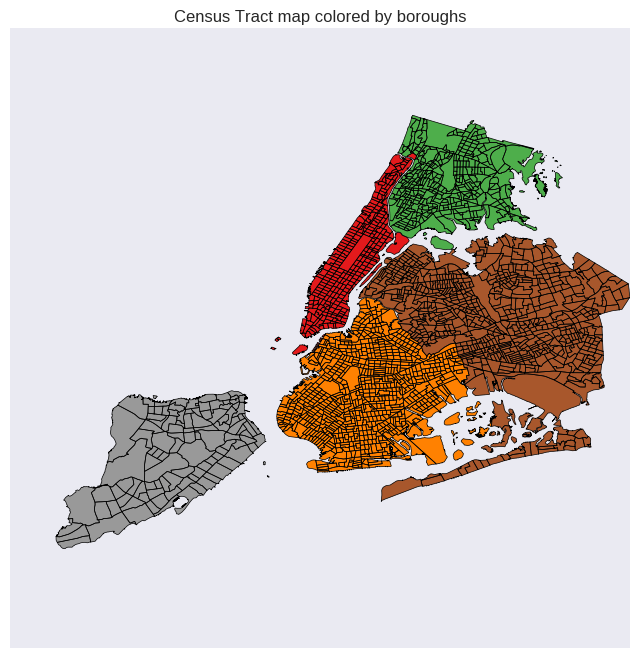

In [8]:
f, ax = plt.subplots(figsize=(8,8))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by boroughs")

### Figure 1 Census Tract map

### Load Census Data for 2010

In [10]:
ct_data=DataFrame.from_csv(os.getenv("PUIDATA") + '/ACS_CT2010.csv')
#set index to be the BoroCT2010 code
ct_data.index=ct_data.BoroCT2010.astype(str)

In [11]:
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']]) #SE_T002_002 is population density in social explorer dataset

### Vusualize the Population density for 2010

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


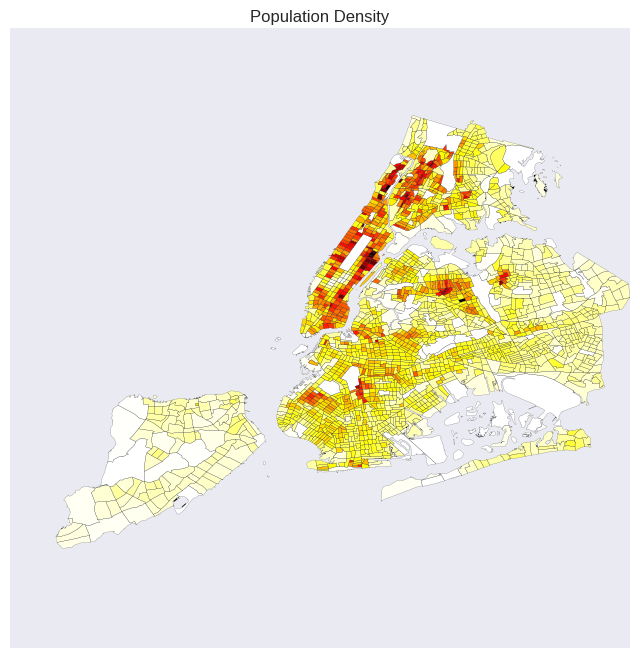

In [12]:
f, ax = plt.subplots(figsize=(8,8))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Population Density")

### Figure2 Population Density Map

### Explore CitiBike data

In [47]:
df_bike_monthly=DataFrame.from_csv(os.getenv("PUIDATA") + '/CitiBike_monthly_byStation.csv')
df_bike_monthly.head()

1000  1001   1002  1003  1004  1005  1006  1007  1008  1009  ...   \
starttime                                                                ...    
2013-07-31  2343  3914   6979  2750  4914  2229  2183  3139  3622  2368  ...    
2013-08-31  2696  4429   9020  3433  6645  2768  2761  3422  4271  2910  ...    
2013-09-30  2878  5258   9814  3739  7837  3206  2747  3590  4618  2885  ...    
2013-10-31  2920  4409  10456  3520  8928  3237  2530  3909  4169  2542  ...    
2013-11-30  1883  2731   6384  2446  5201  2085  1415  2727  3146  1539  ...    

            1533  1534  1535  1536  1537  1538  1539  1540  1541  1542  
starttime                                                               
2013-07-31     0     0     0     0     0     0     0     0     0     0  
2013-08-31     0     0     0     0     0     0     0     0     0     0  
2013-09-30     0     0     0     0     0     0     0     0     0     0  
2013-10-31     0     0     0     0     0     0     0     0     0     0  
2013-11-30     0     0     0     0     0     0     0     0     0     0  

[5 rows x 543 columns]

In [48]:
df_bike_month = df_bike_monthly.groupby(df_bike_monthly.index.month).sum()

In [49]:
df_bike_month

1000   1001   1002   1003   1004   1005  1006   1007   1008  1009  ...   \
1   2820   3006  10897   4346   6216   4502  1575   5396   2448  2235  ...    
2   2412   2911   9963   3677   5674   4297  1723   4882   1854  2059  ...    
3   3707   4740  16397   5371   9430   7216  3099   7886   3610  3543  ...    
4   5194   8405  21667   8217  14557   9925  4619  11998   5618  5083  ...    
5   6488  13275  28581  11073  19018  13067  6213  14416   7692  6787  ...    
6   7756  10676  29213  11507  20534  13480  6155  14929   6389  7592  ...    
7   7151  10961  27145  10217  18352  10850  6563  12559  12510  7379  ...    
8   7515  11232  31017  11294  21004  11496  7444  13806  12865  7916  ...    
9   8274  13097  31462  11776  22859  13194  7612  14179  13183  8193  ...    
10  8189  11379  30326  10249  21877  13743  6438  13086  10881  7294  ...    
11  5578   7686  21174   8075  14524   9524  4352   8589   9384  4930  ...    
12  4224   5456  15683   6147   9999   7158  3029   7618   6935  3541  ...    

    1533  1534  1535  1536  1537  1538  1539  1540  1541  1542  
1      0     0     0     0     0     0     0     0     0     0  
2      0     0     0     0     0     0     0     0     0     0  
3      0     0     0     0     0     0     0     0     0     0  
4    310     0     0     0     0     0     0     0     0     0  
5    901    62    20  2859   394     0     0     0     0     0  
6   1036     0     0  7009  1109   665  2470   178   852   615  
7      0     0     0     0     0     0     0     0     0     0  
8      0     0     0     0     0     0     0     0     0     0  
9      0     0     0     0     0     0     0     0     0     0  
10     0     0     0     0     0     0     0     0     0     0  
11     0     0     0     0     0     0     0     0     0     0  
12     0     0     0     0     0     0     0     0     0     0  

[12 rows x 543 columns]

### Split data to Winter and Summer

In [50]:
df_winter = df_bike_monthly[(df_bike_monthly.index.month == 1) 
                            | (df_bike_monthly.index.month == 2)]
df_winter

1000  1001  1002  1003  1004  1005  1006  1007  1008  1009  ...   \
starttime                                                               ...    
2014-01-31   956  1337  3178  1251  1920  1130   477  1412  1082   681  ...    
2014-02-28   650   960  2920   676  1808   933   508  1045   963   530  ...    
2015-01-31   833     0  3186  1248  1992  1429   442  1499  1366   619  ...    
2015-02-28   562     0  2130   913  1363  1140   356  1023   891   447  ...    
2016-01-31  1031  1669  4533  1847  2304  1943   656  2485     0   935  ...    
2016-02-29  1200  1951  4913  2088  2503  2224   859  2814     0  1082  ...    

            1533  1534  1535  1536  1537  1538  1539  1540  1541  1542  
starttime                                                               
2014-01-31     0     0     0     0     0     0     0     0     0     0  
2014-02-28     0     0     0     0     0     0     0     0     0     0  
2015-01-31     0     0     0     0     0     0     0     0     0     0  
2015-02-28     0     0     0     0     0     0     0     0     0     0  
2016-01-31     0     0     0     0     0     0     0     0     0     0  
2016-02-29     0     0     0     0     0     0     0     0     0     0  

[6 rows x 543 columns]

In [38]:
df_summer = df_bike_monthly[(df_bike_monthly.index.month == 7) 
                            | (df_bike_monthly.index.month == 8)]
df_summer

1000  1001   1002  1003  1004  1005  1006  1007  1008  1009  ...   \
starttime                                                                ...    
2013-07-31  2343  3914   6979  2750  4914  2229  2183  3139  3622  2368  ...    
2013-08-31  2696  4429   9020  3433  6645  2768  2761  3422  4271  2910  ...    
2014-07-31  2252  3216   9825  3509  7014  3224  2195  3732  4042  2268  ...    
2014-08-31  2179  3004  10196  3573  7328  3311  2213  4078  4011  2168  ...    
2015-07-31  2556  3831  10341  3958  6424  5397  2185  5688  4846  2743  ...    
2015-08-31  2640  3799  11801  4288  7031  5417  2470  6306  4583  2838  ...    

            1533  1534  1535  1536  1537  1538  1539  1540  1541  1542  
starttime                                                               
2013-07-31     0     0     0     0     0     0     0     0     0     0  
2013-08-31     0     0     0     0     0     0     0     0     0     0  
2014-07-31     0     0     0     0     0     0     0     0     0     0  
2014-08-31     0     0     0     0     0     0     0     0     0     0  
2015-07-31     0     0     0     0     0     0     0     0     0     0  
2015-08-31     0     0     0     0     0     0     0     0     0     0  

[6 rows x 543 columns]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


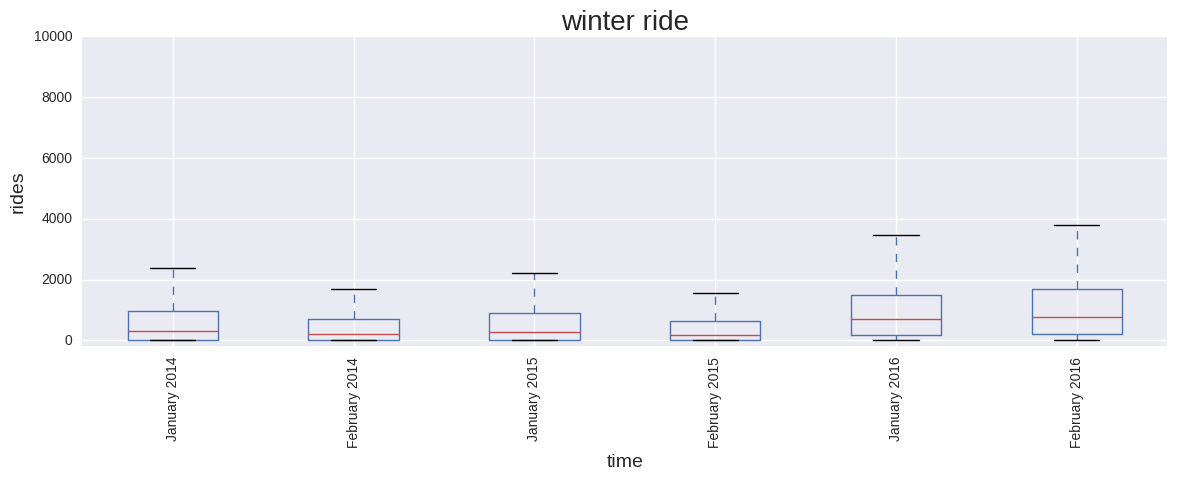

In [36]:
f, ax = plt.subplots( figsize=(14,4))

df_winter_=df_winter.copy()
df_winter_.index=df_winter_.index.strftime("%B %Y")
df_winter_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,10000])
ax.set_title('winter ride', fontsize =20 )
ax.set_xlabel('time', fontsize =14)
ax.set_ylabel('rides', fontsize =14)
plt.show()

### Figure3 Winter Rides box plot

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


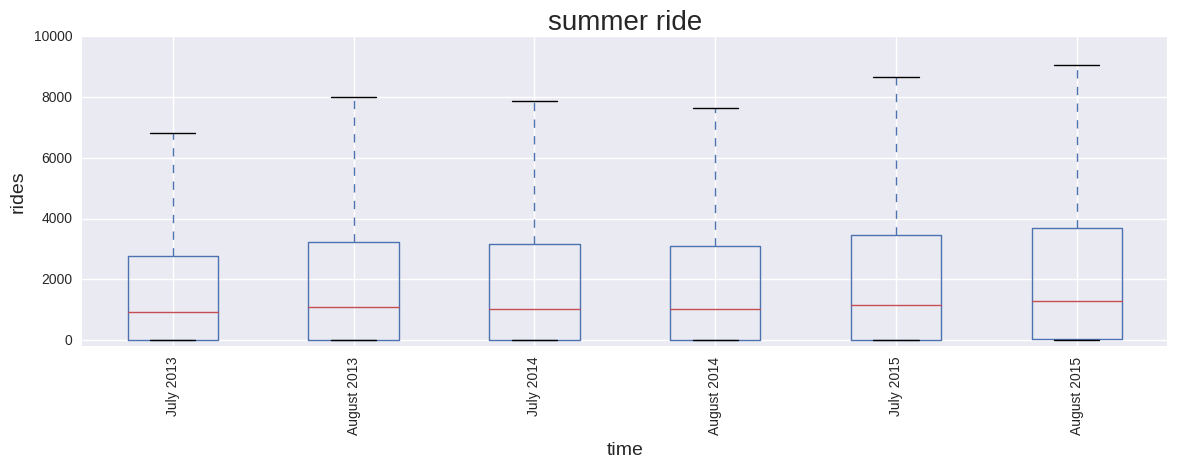

In [39]:
f, ax = plt.subplots( figsize=(14,4))

df_summer_=df_summer.copy()
df_summer_.index=df_summer_.index.strftime("%B %Y")
df_summer_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,10000])
ax.set_title('summer ride', fontsize =20 )
ax.set_xlabel('time', fontsize =14)
ax.set_ylabel('rides', fontsize =14)
plt.show()

### Figure4 Summer Rides box plot

### Map CitiBike Data to CT level


In [57]:
station_id=DataFrame.from_csv(os.getenv("PUIDATA") + '/Station_id.csv')
#convert station_ids to string index
station_id.index=station_id.index.astype(str)
station_id.head()

lat        lon
1000  40.753231 -73.970325
1001  40.749718 -74.002950
1002  40.730287 -73.990765
1003  40.718939 -73.992663
1004  40.734927 -73.992005

In [58]:
# combine lat and lon to one column
station_id['lonlat'] = list(zip(station_id.lon,station_id.lat))
# Create Point Geometry for based on lonlat column
station_id['geometry'] = station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

lat        lon                         lonlat  \
1000  40.753231 -73.970325    (-73.97032517, 40.75323098)   
1001  40.749718 -74.002950  (-74.002950346, 40.749717753)   
1002  40.730287 -73.990765     (-73.9907647, 40.73028666)   
1003  40.718939 -73.992663    (-73.99266288, 40.71893904)   
1004  40.734927 -73.992005    (-73.99200509, 40.73492695)   

                                     geometry  
1000         POINT (-73.97032517 40.75323098)  
1001  POINT (-74.00295034600001 40.749717753)  
1002          POINT (-73.9907647 40.73028666)  
1003         POINT (-73.99266288 40.71893904)  
1004   POINT (-73.99200509000001 40.73492695)

In [59]:
a = []
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
station_id['BoroCT2010'] = a

In [60]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add winter/ summer rides to the station GeoDataFrame with CT code

In [61]:
station_id['Winter']=df_winter.sum()
station_id['Summer']=df_summer.sum()

In [92]:
temp=station_id[['Summer']]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']
ct_shape_summer=ct_shape.join(temp)
ct_shape_summer.fillna(0,inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [93]:
temp=station_id[['Winter']]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']
ct_shape_winter=ct_shape.join(temp)
ct_shape_winter.fillna(0,inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
Removing the CTs that are out of zoom boundries

In [94]:
ct_shape_summer_Zoom=(ct_shape_summer[ct_shape_summer.centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])
ct_shape_winter_Zoom=(ct_shape_winter[ct_shape_winter.centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

### Map the monthly rides

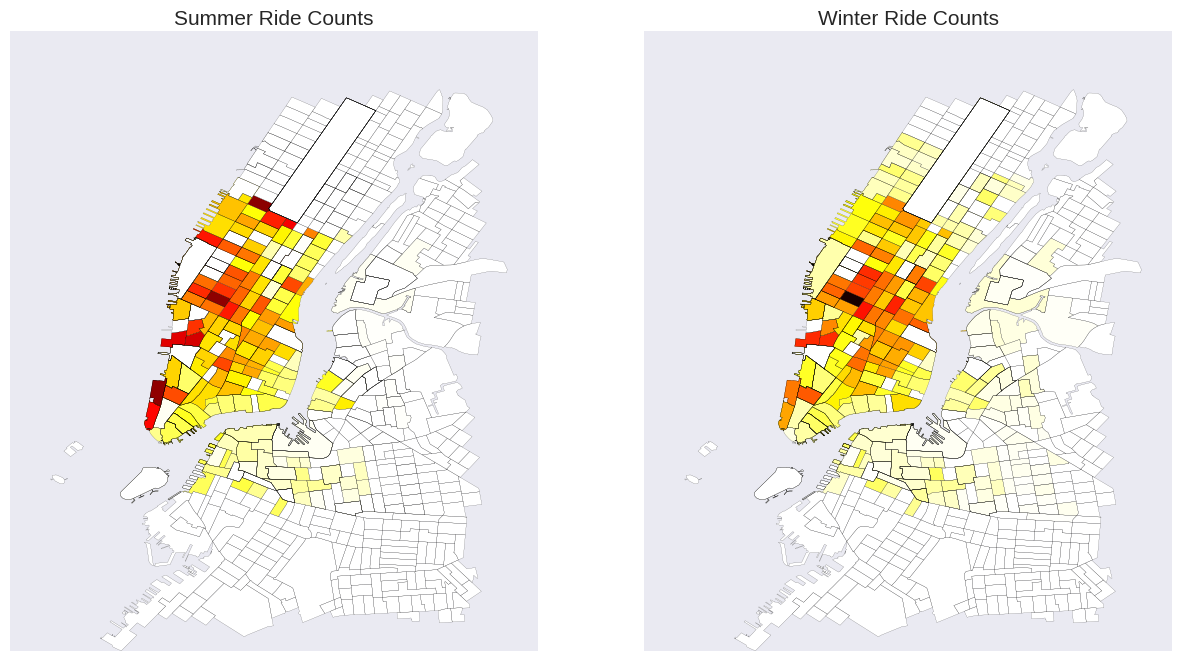

In [126]:
fig = plt.figure(figsize = (15,8))
ax1 =fig.add_subplot(121)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ct_shape_summer_Zoom.plot(column='Summer',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax1)
plt.title("Summer Ride Counts",fontsize =15)

ax2 = fig.add_subplot(122)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ct_shape_winter_Zoom.plot(column='Winter',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax2)
plt.title("Winter Ride Counts",fontsize =15)

### Figure5 Winter and Summer Rides Density Map

In [110]:
path=os.getenv("PUIDATA") + '/ct_shape_Winter_Zoom.shp'
ct_shape_winter_Zoom.to_file(path)

In [111]:
qW_CT_winter=ps.queen_from_shapefile(path)
qW_CT_winter

Island id:  [0]


In [112]:
qW_CT_winter.cardinalities[10]

9

In [113]:
Wmatrix, ids = qW_CT_winter.full()

In [114]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [115]:
qW_CT_winter.transform = 'r'

In [106]:
winterRide=ct_shape_winter_Zoom.Winter
winterRideLag=ps.lag_spatial(qW_CT_winter, winterRide)
winterRideLagQ10 = ps.Quantiles(winterRideLag, k=10)
winterRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    16.200                 1
   16.200 < x[i] <=   345.139                79
  345.139 < x[i] <=   838.211                80
  838.211 < x[i] <=  1266.768                79
 1266.768 < x[i] <=  1787.500                80
 1787.500 < x[i] <=  4326.929                79
 4326.929 < x[i] <=  5806.667                80
 5806.667 < x[i] <=  7144.485                79
 7144.485 < x[i] <= 11609.500                80

In [117]:
path=os.getenv("PUIDATA") + '/ct_shape_Summer_Zoom.shp'
ct_shape_summer_Zoom.to_file(path)
qW_CT_summer=ps.queen_from_shapefile(path)

Island id:  [0]


In [122]:
qW_CT_summer
qW_CT_summer.cardinalities[10]

9

In [124]:
Wmatrix, ids = qW_CT_summer.full()

In [121]:
qW_CT_summer.transform = 'r'
summerRide=ct_shape_summer_Zoom.Summer
summerRideLag=ps.lag_spatial(qW_CT_summer, summerRide)
summerRideLagQ10 = ps.Quantiles(summerRideLag, k=10)
summerRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               185
    0.000 < x[i] <=    68.688                55
   68.688 < x[i] <=  1112.778                79
 1112.778 < x[i] <=  2959.573                79
 2959.573 < x[i] <=  5279.850                80
 5279.850 < x[i] <= 12529.833                79
12529.833 < x[i] <= 18461.765                80
18461.765 < x[i] <= 21210.900                79
21210.900 < x[i] <= 31817.929                80

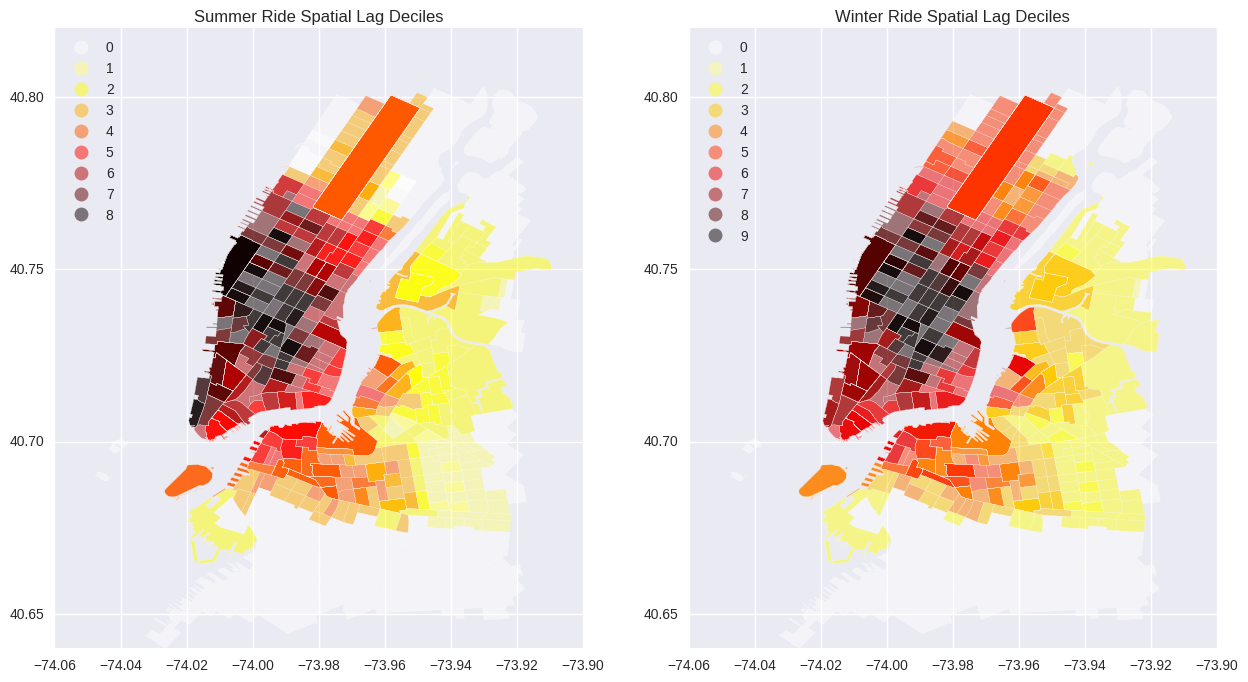

In [125]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(121)
ct_shape_summer_Zoom.assign(cl=summerRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Summer Ride Spatial Lag Deciles")


ax2 = fig.add_subplot(122)
ct_shape_winter_Zoom.assign(cl=winterRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Winter Ride Spatial Lag Deciles")

### Figure6 Winter and Summer Rides spatial lag map

In [127]:
b_s,a_s = np.polyfit(summerRide, summerRideLag, 1)
print 'summer:' , b_s,a_s

summer: 0.622582369945 2851.10697405


In [128]:
b_w,a_w = np.polyfit(winterRide, winterRideLag, 1)
print 'winter:' ,b_w,a_w

winter: 0.657640492869 897.202564321


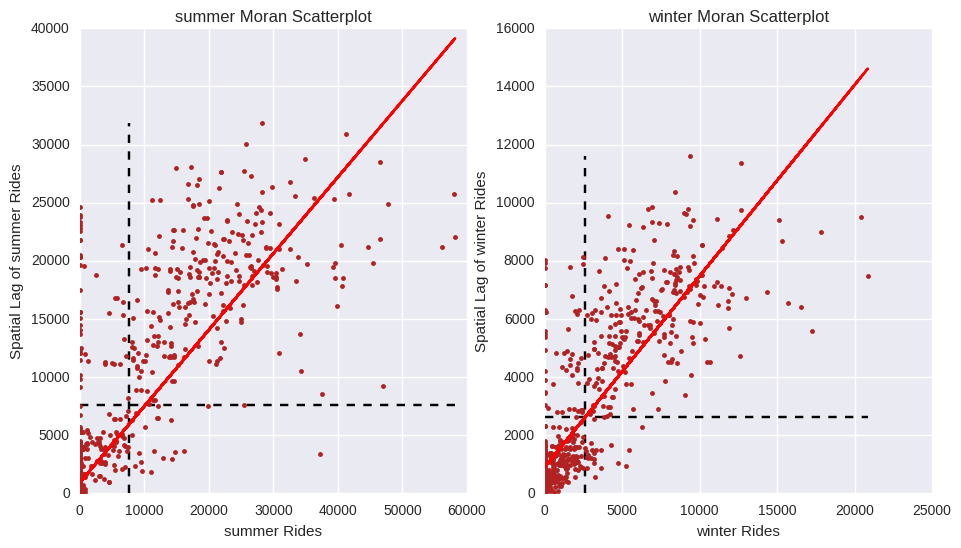

In [130]:
fig = plt.figure(figsize = (11,6))
ax1 = fig.add_subplot(121)

plt.plot(summerRide, summerRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(summerRide.mean(), summerRideLag.min(), summerRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(summerRideLag.mean(), summerRide.min(), summerRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(summerRide, a_s + b_s*summerRide, 'r')
plt.title('summer Moran Scatterplot')
plt.ylabel('Spatial Lag of summer Rides')
plt.xlabel('summer Rides')




ax2 = fig.add_subplot(122)

plt.plot(winterRide, winterRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(winterRide.mean(), winterRideLag.min(), winterRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(winterRideLag.mean(), winterRide.min(), winterRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(winterRide, a_w + b_w*winterRide, 'r')
plt.title('winter Moran Scatterplot')
plt.ylabel('Spatial Lag of winter Rides')
plt.xlabel('winter Rides')

### Figure7 Moran scatter plots for winter and summer ride

In [139]:
I_MonthlyRide_summer = ps.Moran(summerRide, qW_CT)
I_MonthlyRide_winter = ps.Moran(winterRide, qW_CT)

In [140]:
I_MonthlyRide_summer.I, I_MonthlyRide_summer.p_sim

(0.62279123250566315, 0.001)

In [141]:
I_MonthlyRide_winter.I, I_MonthlyRide_winter.p_sim

(0.65779906566734103, 0.001)

In [142]:
LMo_MonthlyRide_summer = ps.Moran_Local(np.array(summerRide), qW_CT, permutations=999)
LMo_MonthlyRide_winter = ps.Moran_Local(np.array(winterRide), qW_CT, permutations=999)

In [143]:
LMo_MonthlyRide_summer.Is[0:5], LMo_MonthlyRide_summer.p_sim[0:5]

(array([-0.        , -0.23479175,  0.01890088,  0.01215775,  0.02723133]),
 array([ 0.001,  0.153,  0.335,  0.34 ,  0.34 ]))

In [144]:
LMo_MonthlyRide_winter.Is[0:5], LMo_MonthlyRide_winter.p_sim[0:5]

(array([-0.        , -0.32813867, -0.00149801, -0.00281112, -0.09388843]),
 array([ 0.001,  0.121,  0.451,  0.488,  0.391]))

In [145]:
sigs_summer = MonthlyRide_summer[LMo_MonthlyRide_summer.p_sim <= .001]
W_sigs_summer = MonthlyRideLag_summer[LMo_MonthlyRide_summer.p_sim <= .001]
insigs_summer = MonthlyRide_summer[LMo_MonthlyRide_summer.p_sim > .001]
W_insigs_summer = MonthlyRideLag_summer[LMo_MonthlyRide_summer.p_sim > .001]

In [156]:
sig = LMo_MonthlyRide_summer.p_sim < 0.01
hotspots = LMo_MonthlyRide_summer.q==1 * sig
coldspots = LMo_MonthlyRide_summer.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()
hotcold = hotspots*1 + coldspots*2

Number of Hotspots: 189
Number of Coldspots: 217


In [146]:
sigs_winter = MonthlyRide_winter[LMo_MonthlyRide_winter.p_sim <= .001]
W_sigs_winter = MonthlyRideLag_winter[LMo_MonthlyRide_winter.p_sim <= .001]
insigs_winter = MonthlyRide_winter[LMo_MonthlyRide_winter.p_sim > .001]
W_insigs_winter = MonthlyRideLag_winter[LMo_MonthlyRide_winter.p_sim > .001]

In [155]:
sig = LMo_MonthlyRide_winter.p_sim < 0.01
hotspots = LMo_MonthlyRide_winter.q==1 * sig
coldspots = LMo_MonthlyRide_winter.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()
hotcold = hotspots*1 + coldspots*2

Number of Hotspots: 194
Number of Coldspots: 208


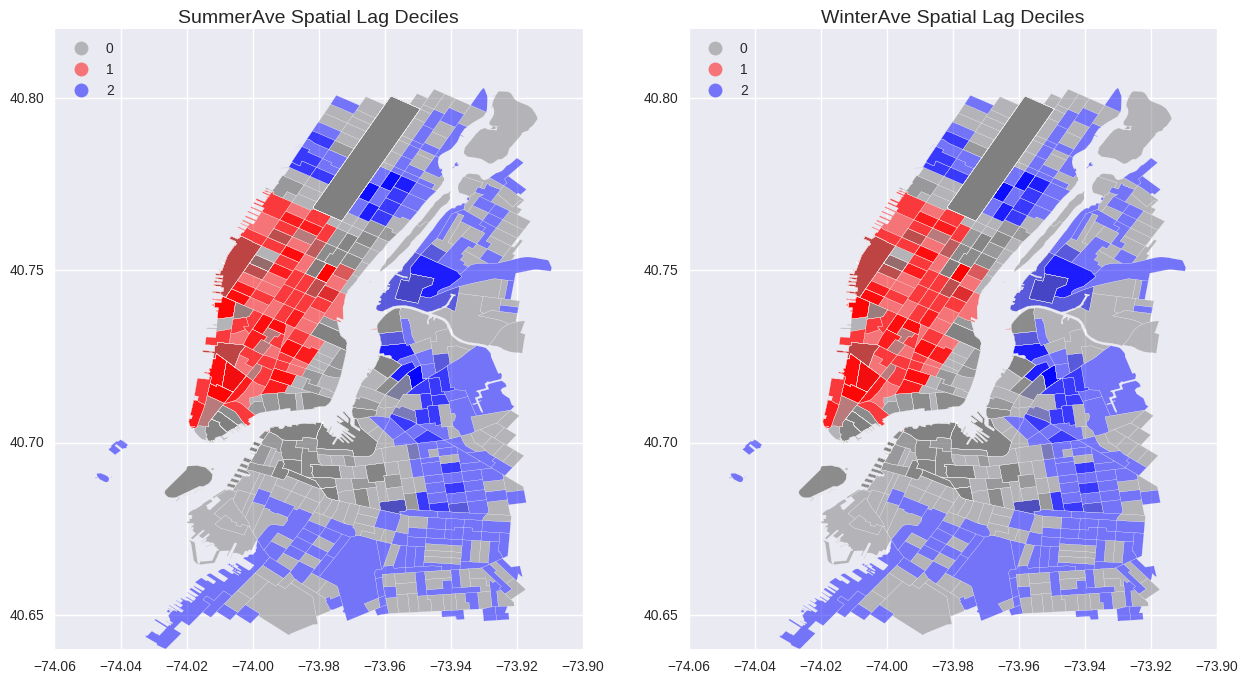

In [158]:
hcmap = colors.ListedColormap(['grey','red','blue'])
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(121)
ct_shape_summer_Zoom.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("SummerAve Spatial Lag Deciles",fontsize = 14)

ax2 = fig.add_subplot(122)
ct_shape_winter_Zoom.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("WinterAve Spatial Lag Deciles",fontsize = 14)

### Figure8 Hot and Cold spots plot